In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/Image2.jpg
/kaggle/input/images/Image1.jpg
/kaggle/input/images/Image3.jpg


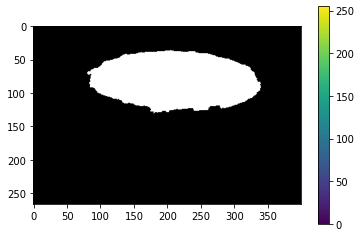

True

In [30]:
# def dice_coef(img, img2):
#         if img.shape != img2.shape:
#             raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
#         else:
            
#             lenIntersection=0
            
#             for i in range(img.shape[0]):
#                 for j in range(img.shape[1]):
#                     if ( np.array_equal(img[i][j],img2[i][j]) ):
#                         lenIntersection+=1
             
#             lenimg=img.shape[0]*img.shape[1]
#             lenimg2=img2.shape[0]*img2.shape[1]  
#             value = (2. * lenIntersection  / (lenimg + lenimg2))
#         return value
img = cv.imread('../input/images/Image3.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,5,350,150)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
# img2 = cv.imread('Image1_GT.png')
# dice_coef(img,img2)
wh = np.where((mask==1)|(mask==3)) 
img[wh] = 255
plt.imshow(img),plt.colorbar(),plt.show()
# cv.imwrite("Image3_seg.png",img)